In [28]:
import json
import pandas as pd
import random
import matplotlib.pyplot as plt

In [8]:
file = "Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        if random.random() < 0.3:
            data.append(json.loads(line))
            
reviews = pd.DataFrame(data)

In [9]:
reviews.shape

(749262, 10)

In [10]:
reviews = reviews[reviews['verified_purchase'] == True] #keep only verified purchases

In [11]:
reviews.shape

(700223, 10)

In [12]:
reviews = reviews[['rating','parent_asin','text']] #keep only the columns we are interested in

In [13]:
reviews

,rating,parent_asin,text
0,5.0,B09QH7GPH1,Cutest charms for my Easter bracelets.
1,5.0,B01E39FOVS,I went through the two original bands that cam...
2,5.0,B08T8T8MT7,He Man collector
3,5.0,B072Q796CB,So cute
5,3.0,B08JPSJDML,It is very pretty. But it is easy to break if ...
...,...,...,...
749256,5.0,B0799599X8,"Loved it. Turned my raggity shoes, brand new"
749257,5.0,B0799599X8,First time I’ve ever used this brand. Excellen...
749259,1.0,B07F1VTBQ5,The belt has no leather material. It's plastic...
749260,1.0,B07HF4F6LP,Y’all took to damn long I got it may 18th and ...


In [15]:
file = "meta_Amazon_Fashion.jsonl"
data = []

with open(file, 'r') as f:
    for line in f:
        data.append(json.loads(line))
            
description = pd.DataFrame(data)

In [17]:
description.shape

(826108, 14)

In [18]:
description = description[['title','parent_asin','average_rating']] #keep only the columns we are interested in

In [19]:
description

,title,parent_asin,average_rating
0,YUEDGE 5 Pairs Men's Moisture Control Cushione...,B08BHN9PK5,4.6
1,DouBCQ Women's Palazzo Lounge Wide Leg Casual ...,B08R39MRDW,4.1
2,Pastel by Vivienne Honey Vanilla Girls' Trapez...,B077KJHCJ4,4.3
3,Mento Streamtail,B0811M2JG9,2.0
4,RONNOX Women's 3-Pairs Bright Colored Calf Com...,B07SB2892S,4.3
...,...,...,...
826103,Salimdy Women's Fashion New Ruched Waist Class...,B078HY8B34,2.0
826104,Cat Mom Tshirt Trendy Short Sleeve Crewneck Gr...,B09V5DB85S,5.0
826105,Nike San Francisco 49ers Hot Quarter Zip S/S P...,B00NTQ14CK,5.0
826106,Joe's USA Mens 3X-Large Tall Long Sleeve Easy ...,B00Y8O4N8E,5.0


In [ ]:
merged_df = reviews.merge(description, on="parent_asin", how="inner")

In [21]:
merged_df

,rating,parent_asin,text,title,average_rating
0,5.0,B09QH7GPH1,Cutest charms for my Easter bracelets.,"Framendino, 10 Pack Rabbit Charms Bunny Pendan...",4.7
1,5.0,B01E39FOVS,I went through the two original bands that cam...,"Samsung Gear S2 Band, Samsung Smartwatch Repla...",5.0
2,5.0,B08T8T8MT7,He Man collector,Adult He-Man Mouth Cover Washable Dustproof Ad...,4.5
3,5.0,B072Q796CB,So cute,Girls' 2T-12 Linen Casual Dress Summer Floral ...,5.0
4,3.0,B08JPSJDML,It is very pretty. But it is easy to break if ...,"Graduation Gifts for Her 2021, College High Sc...",4.3
...,...,...,...,...,...
700218,5.0,B0799599X8,"Loved it. Turned my raggity shoes, brand new",CleanKicks Shoe Cleaner Kit - Solution & Brush...,4.3
700219,5.0,B0799599X8,First time I’ve ever used this brand. Excellen...,CleanKicks Shoe Cleaner Kit - Solution & Brush...,4.3
700220,1.0,B07F1VTBQ5,The belt has no leather material. It's plastic...,Muddy Girl Pink Camo Belt - Women’s Western Co...,3.7
700221,1.0,B07HF4F6LP,Y’all took to damn long I got it may 18th and ...,Charmed Craft Mother Mom Love Child Charms Ele...,4.5


### Exploring the Dataset

In [30]:
# Check for missing values in merged_df
missing_values = merged_df.isnull().sum()
print("Missing values per column:")
print(missing_values)
print("\nTotal missing values:", missing_values.sum())
print("\nPercentage of missing values per column:")
print((missing_values / len(merged_df) * 100).round(2))


Missing values per column:
rating            0
parent_asin       0
text              0
title             0
average_rating    0
dtype: int64

Total missing values: 0

Percentage of missing values per column:
rating            0.0
parent_asin       0.0
text              0.0
title             0.0
average_rating    0.0
dtype: float64


In [38]:
# Show unique items based on count of title in table form
title_counts = merged_df['title'].value_counts().reset_index()
title_counts.columns = ['Title', 'Count']
title_counts = title_counts.sort_values('Count', ascending=False).reset_index(drop=True)
print(f"Total number of unique titles: {merged_df['title'].nunique()}")
print(f"Total number of rows: {len(merged_df)}\n")
title_counts


Total number of unique titles: 335861
Total number of rows: 700223



,Title,Count
0,Casio F91W-1 Classic Resin Strap Digital Sport...,2181
1,Russell Athletic Men's Dri-Power Fleece Hoodie...,1870
2,NELEUS Women's 3 Pack Compression Base Layer D...,1238
3,90 Degree By Reflex High Waist Squat Proof Tum...,1031
4,NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...,907
...,...,...
335856,JJ Perfection Women's Open Front Knit Long Sle...,1
335857,GOT 16-in-1 Headband - Multifunctional Microfi...,1
335858,Hot Movie Character Quinn Shoes Unique Cool Sh...,1
335859,Women's Fit All Day Relaxed Fit Straight Leg J...,1


##### The casio watch has the most reviews, followed by the fleece hoodie.

In [40]:
# Table displaying titles with the highest average_ratings
title_avg_ratings = merged_df.groupby('title')['average_rating'].mean().reset_index()
title_avg_ratings.columns = ['Title', 'Average Rating']
title_avg_ratings = title_avg_ratings.sort_values('Average Rating', ascending=False).reset_index(drop=True)
title_avg_ratings


,Title,Average Rating
0,Geckatte Womens Bohemian Floral Printed Skirts...,5.0
1,Foucome Women's Button Front Slim Fit Capris B...,5.0
2,TAHARI Womens Floral Lace Jumpsuit Red 8,5.0
3,Four Way Cross Rosary with Wooden Beads Necklace,5.0
4,"TAIDAF1981 Leather Enveloped Clutch,Women Form...",5.0
...,...,...
335856,Hanes Women's Long-Sleeve Crewneck T-Shirt_Siz...,1.0
335857,"7"" Piglet Feet",1.0
335858,Fullife Compatible for Apple Watch Band 42mm 4...,1.0
335859,MaliaDress A Line Lace Chiffon Evening Bridesm...,1.0


/var/folders/kc/n08kwy8s585_2lbjxjmy0d9m0000gn/T/ipykernel_20713/3218966857.py:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


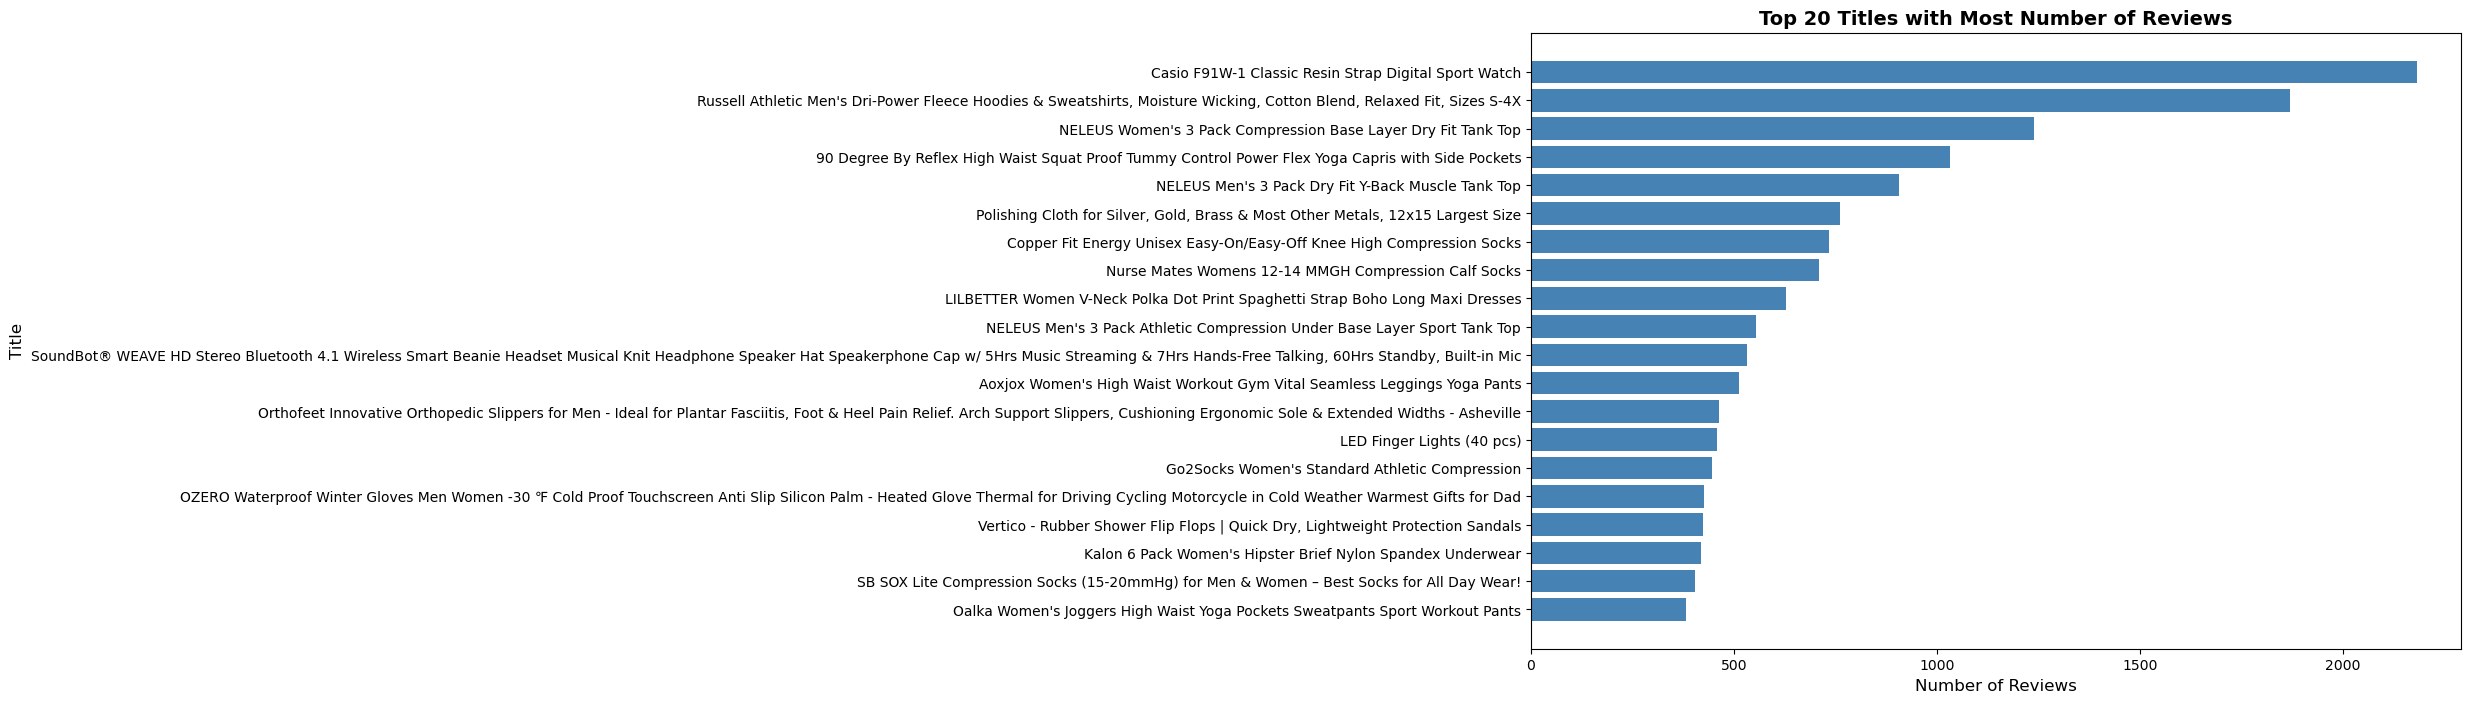

Total number of unique titles: 335861

Top 10 titles by review count:
                                               Title  Number of Reviews
0  Casio F91W-1 Classic Resin Strap Digital Sport...               2181
1  Russell Athletic Men's Dri-Power Fleece Hoodie...               1870
2  NELEUS Women's 3 Pack Compression Base Layer D...               1238
3  90 Degree By Reflex High Waist Squat Proof Tum...               1031
4  NELEUS Men's 3 Pack Dry Fit Y-Back Muscle Tank...                907
5  Polishing Cloth for Silver, Gold, Brass & Most...                761
6  Copper Fit Energy Unisex Easy-On/Easy-Off Knee...                733
7  Nurse Mates Womens 12-14 MMGH Compression Calf...                709
8  LILBETTER Women V-Neck Polka Dot Print Spaghet...                628
9  NELEUS Men's 3 Pack Athletic Compression Under...                554


In [41]:
# Bar chart showing titles with the most number of reviews (text)
title_review_counts = merged_df.groupby('title')['text'].count().reset_index()
title_review_counts.columns = ['Title', 'Number of Reviews']
title_review_counts = title_review_counts.sort_values('Number of Reviews', ascending=False).reset_index(drop=True)

# Get top 20 titles for better visualization
top_titles = title_review_counts.head(20)

# Create bar chart
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_titles)), top_titles['Number of Reviews'], color='steelblue')
plt.yticks(range(len(top_titles)), top_titles['Title'])
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Title', fontsize=12)
plt.title('Top 20 Titles with Most Number of Reviews', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Show highest at top
plt.tight_layout()
plt.show()

print(f"Total number of unique titles: {len(title_review_counts)}")
print(f"\nTop 10 titles by review count:")
print(top_titles.head(10))


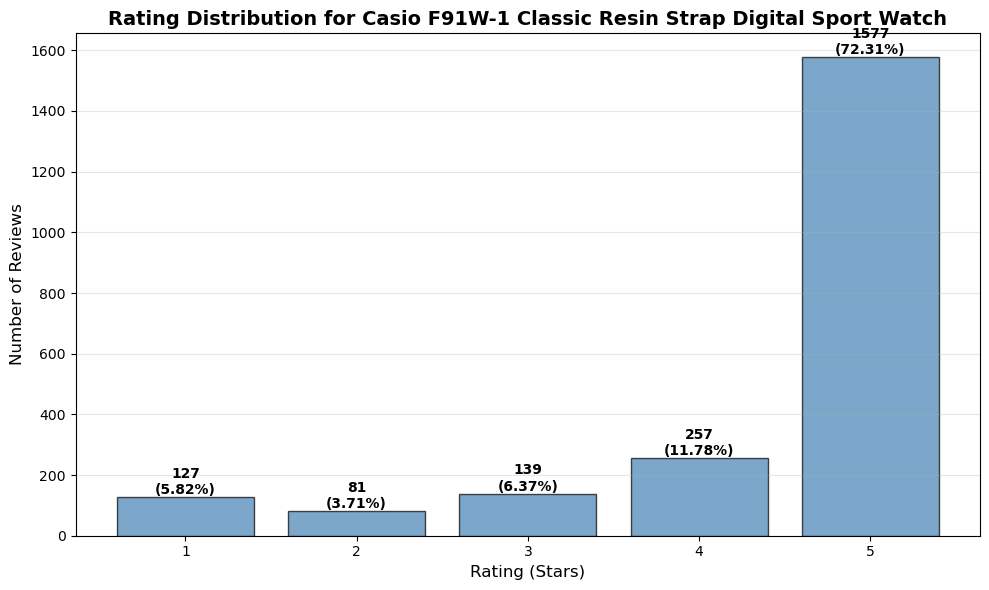

Total reviews: 2181

Rating distribution:
rating
1.0     127
2.0      81
3.0     139
4.0     257
5.0    1577
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 5.82%
  2.0 stars: 3.71%
  3.0 stars: 6.37%
  4.0 stars: 11.78%
  5.0 stars: 72.31%

Average rating: 4.41
Median rating: 5.00


In [42]:
# Distribution of ratings for Casio F91W-1 Classic Resin Strap Digital Sport Watch
casio_title = "Casio F91W-1 Classic Resin Strap Digital Sport Watch"
casio_df = merged_df[merged_df['title'] == casio_title]

# Count ratings
rating_dist = casio_df['rating'].value_counts().sort_index()
rating_percentages = (casio_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title(f'Rating Distribution for {casio_title}', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (rating, count) in enumerate(rating_dist.items()):
    plt.text(rating, count, f'{count}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews: {len(casio_df)}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}%")
print(f"\nAverage rating: {casio_df['rating'].mean():.2f}")
print(f"Median rating: {casio_df['rating'].median():.2f}")


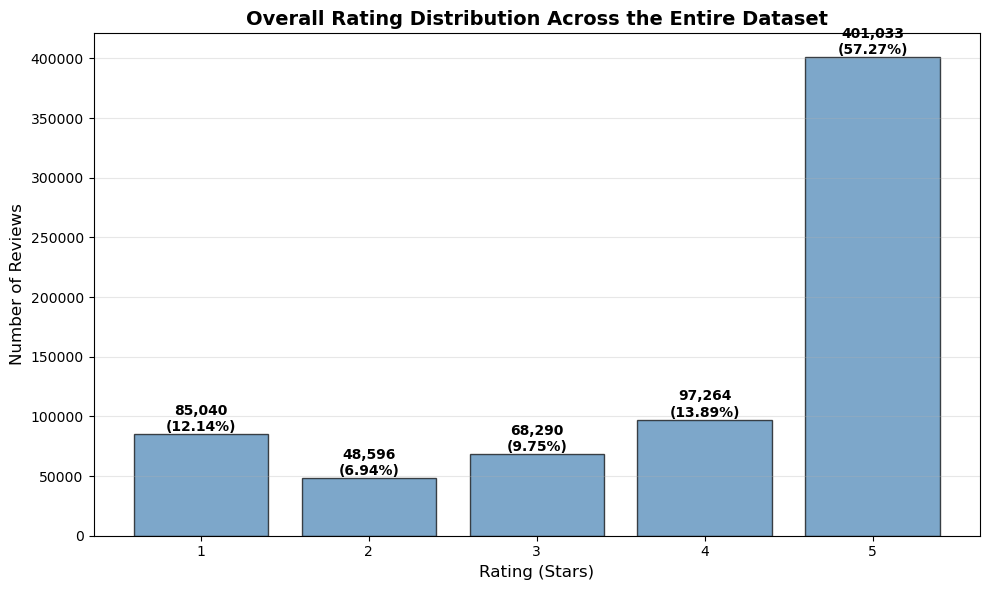

Total reviews in dataset: 700,223

Rating distribution:
rating
1.0     85040
2.0     48596
3.0     68290
4.0     97264
5.0    401033
Name: count, dtype: int64

Rating percentages:
  1.0 stars: 12.14% (85,040 reviews)
  2.0 stars: 6.94% (48,596 reviews)
  3.0 stars: 9.75% (68,290 reviews)
  4.0 stars: 13.89% (97,264 reviews)
  5.0 stars: 57.27% (401,033 reviews)

Average rating: 3.97
Median rating: 5.00
Standard deviation: 1.43


In [43]:
# Overall distribution of ratings across the whole dataset
rating_dist = merged_df['rating'].value_counts().sort_index()
rating_percentages = (merged_df['rating'].value_counts(normalize=True).sort_index() * 100).round(2)

# Create bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(rating_dist.index, rating_dist.values, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Rating (Stars)', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Overall Rating Distribution Across the Entire Dataset', fontsize=14, fontweight='bold')
plt.xticks(rating_dist.index)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for rating, count in rating_dist.items():
    plt.text(rating, count, f'{count:,}\n({rating_percentages[rating]}%)', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"Total reviews in dataset: {len(merged_df):,}")
print(f"\nRating distribution:")
print(rating_dist)
print(f"\nRating percentages:")
for rating in sorted(rating_percentages.index):
    print(f"  {rating} stars: {rating_percentages[rating]}% ({rating_dist[rating]:,} reviews)")
print(f"\nAverage rating: {merged_df['rating'].mean():.2f}")
print(f"Median rating: {merged_df['rating'].median():.2f}")
print(f"Standard deviation: {merged_df['rating'].std():.2f}")


In [48]:
# Products with the lowest ratings (including review text)
# First, calculate average rating per product
title_avg_ratings = merged_df.groupby('title')['rating'].mean().reset_index()
title_avg_ratings.columns = ['title', 'avg_rating']
title_avg_ratings = title_avg_ratings.sort_values('avg_rating', ascending=True)

# Merge back with original data to get all reviews for lowest-rated products
# Get top N products with lowest ratings (e.g., top 100)
lowest_rated_titles = title_avg_ratings.head(100)['title'].tolist()
lowest_rated_df = merged_df[merged_df['title'].isin(lowest_rated_titles)].copy()

# Add average rating column for each product
lowest_rated_df = lowest_rated_df.merge(title_avg_ratings, on='title', how='left')

# Sort by average rating (ascending) and then by individual rating
lowest_rated_df = lowest_rated_df.sort_values(['avg_rating', 'rating'], ascending=[True, True]).reset_index(drop=True)

# Select and rename columns for display
result_df = lowest_rated_df[['title', 'rating', 'text', 'avg_rating']].copy()
result_df.columns = ['Title', 'Review Rating', 'Review Text', 'Product Average Rating']
result_df['Product Average Rating'] = result_df['Product Average Rating'].round(2)

print(f"Reviews for products with the lowest average ratings:")
print(f"Showing reviews for top 100 lowest-rated products")
print(f"Total reviews shown: {len(result_df)}\n")
result_df


Reviews for products with the lowest average ratings:
Showing reviews for top 100 lowest-rated products
Total reviews shown: 105



,Title,Review Rating,Review Text,Product Average Rating
0,Remidoo Women's Solid Round Neck Puff Long Sle...,1.0,The shirt looks like a little girls shirt. Ret...,1.0
1,Remidoo Women's Summer Daily Ribbed Knit Relax...,1.0,"I couldn't even put it on, my usual size was t...",1.0
2,Remidoo Women's Casual Short Sleeve Letter Pri...,1.0,I didn't expect much but was still disappointe...,1.0
3,Avanova Women's Leopard Printed Ruffle Hem Lon...,1.0,Returned this blouse. Does not look as display...,1.0
4,Eyekepper Grey/Brown/G15 Lens 3-pack Clip-on P...,1.0,I ordered the 3 pack but only the one pack gam...,1.0
...,...,...,...,...
100,EyeSun Glasses Pouch Soft Leather Eyelasses Po...,1.0,I received 2 purple boxes not 2 soft leather p...,1.0
101,Eyekepper Metal Frame Rim Polarized Lens Clip ...,1.0,"The lenses is very dark,",1.0
102,Avarious Motorola Moto X Pure Edition Wallet Case,1.0,Luv the color but how am I supposed to take ph...,1.0
103,Avenged Sevenfold Men's Baseball Cap Adjustabl...,1.0,I bought the item twice. It was perfect the fi...,1.0


testing testing